In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import hashlib
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Sample-Superstore.csv", encoding='latin-1')
# # Load the dataset
# file_path = 'Sample - Superstore.csv'  # Replace with your file path
# df = pd.read_csv(file_path, encoding='latin1')

In [3]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [4]:
# Data Cleaning and Preparation
# Make sure to handle mixed date formats correctly
def parse_mixed_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')  # Try MM/DD/YYYY first
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%d-%m-%Y')  # Try DD-MM-YYYY if MM/DD/YYYY fails
        except ValueError:
            return pd.NaT  # Return Not a Time if both fail

df['Order Date'] = df['Order Date'].apply(parse_mixed_date)
df['Ship Date'] = df['Ship Date'].apply(parse_mixed_date)

In [5]:
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)
# df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True)

In [6]:
# Data Cleaning and Preparation
# Assuming your date format is MM/DD/YYYY
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
# df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y') #apply also to the ship date.
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df.dropna(subset=['Sales', 'Profit', 'Quantity'], inplace=True)
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# 1. Which product categories generate the most profit?

1. Product Categories Generating Most Profit:
 Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


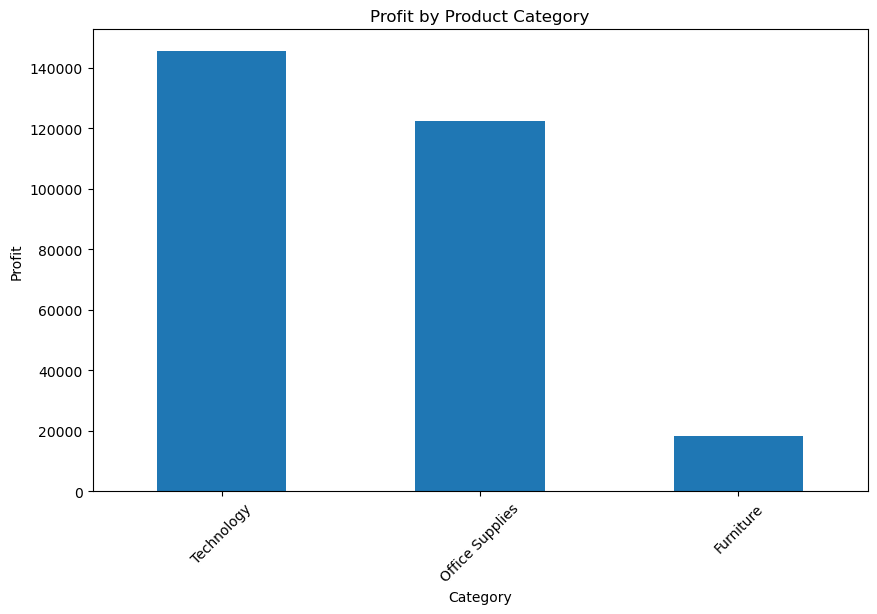

In [7]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("1. Product Categories Generating Most Profit:\n", category_profit)
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar')
plt.title('Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Quarter', 'Shipping Time'],
      dtype='object')

In [9]:
# Recency
max_date = df['Order Date'].max()
rfm_recency = df.groupby('Customer ID')['Order Date'].max().apply(lambda x: (max_date - x).days)

# Frequency
rfm_frequency = df.groupby('Customer ID')['Order ID'].nunique()

# Monetary Value
rfm_monetary = df.groupby('Customer ID')['Sales'].sum()

# Create RFM DataFrame
rfm_df = pd.DataFrame({
'Recency': rfm_recency,
'Frequency': rfm_frequency,
'Monetary': rfm_monetary
})

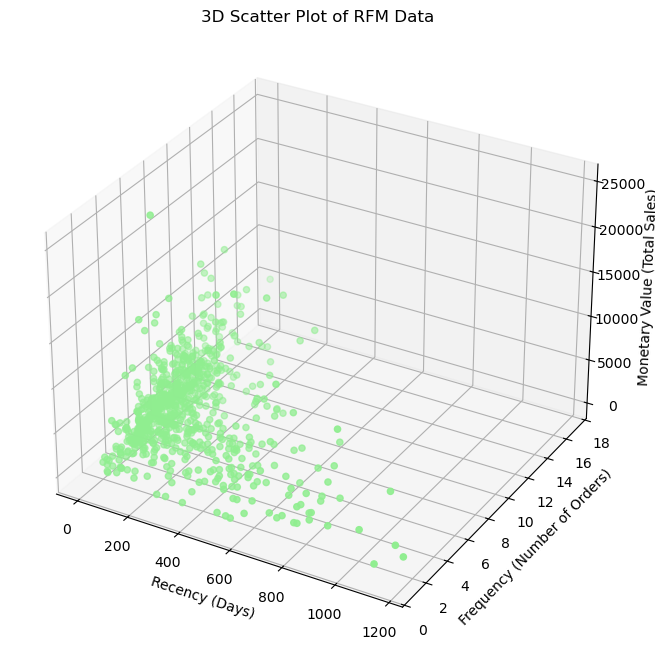

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c='lightgreen', marker='o')

ax.set_xlabel('Recency (Days)')
ax.set_ylabel('Frequency (Number of Orders)')
ax.set_zlabel('Monetary Value (Total Sales)')
ax.set_title('3D Scatter Plot of RFM Data')

plt.show()

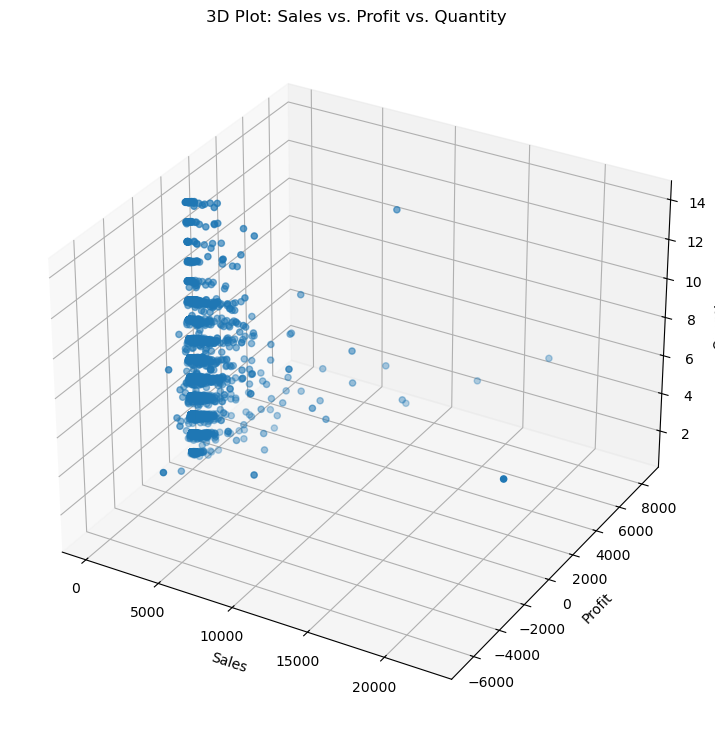

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Sales'], df['Profit'], df['Quantity'])

ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Quantity')
ax.set_title('3D Plot: Sales vs. Profit vs. Quantity')

plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

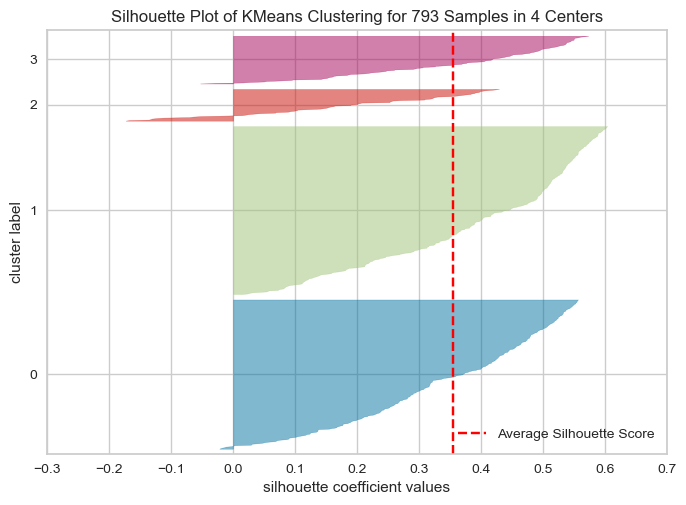

Average silhouette score is : 0.3554426645666678


In [13]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# K-Means Clustering (Example: 3 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figur
# Compute the average silhouette score
silhouette_avg = silhouette_score(rfm_scaled, rfm_df['Cluster'])
print('Average silhouette score is :' , silhouette_avg)

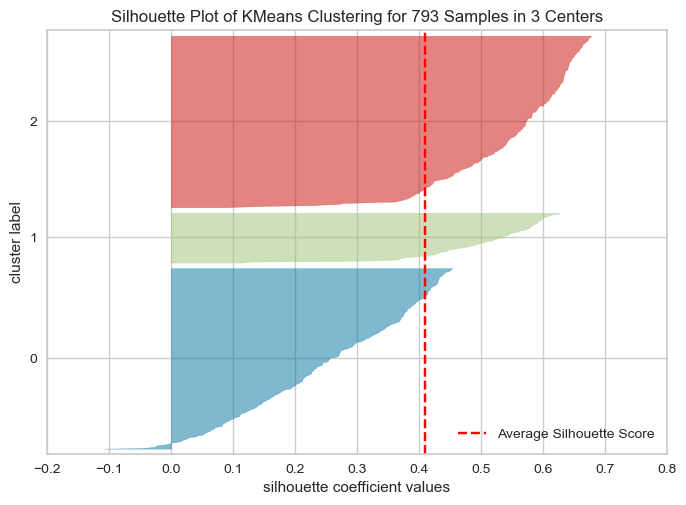

Average silhouette score is : 0.4093771493555855


In [14]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# K-Means Clustering (Example: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figur
# Compute the average silhouette score
silhouette_avg = silhouette_score(rfm_scaled, rfm_df['Cluster'])
print('Average silhouette score is :' , silhouette_avg)

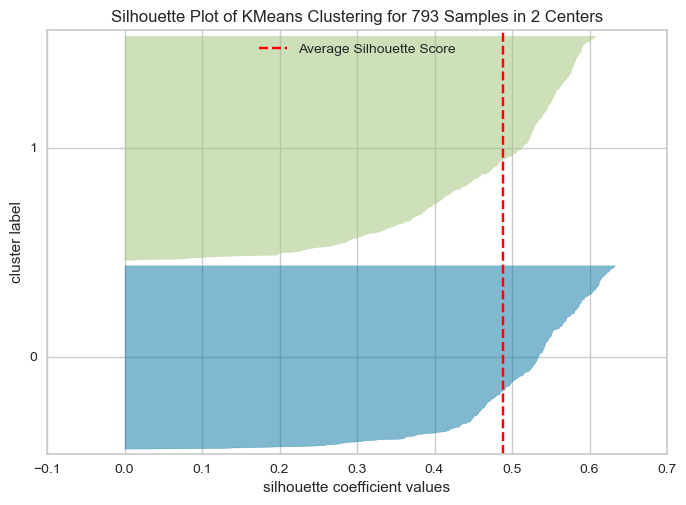

Average silhouette score is : 0.4884236789668488


In [15]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# K-Means Clustering (Example: 3 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figur
# Compute the average silhouette score
silhouette_avg = silhouette_score(rfm_scaled, rfm_df['Cluster'])
print('Average silhouette score is :' , silhouette_avg)

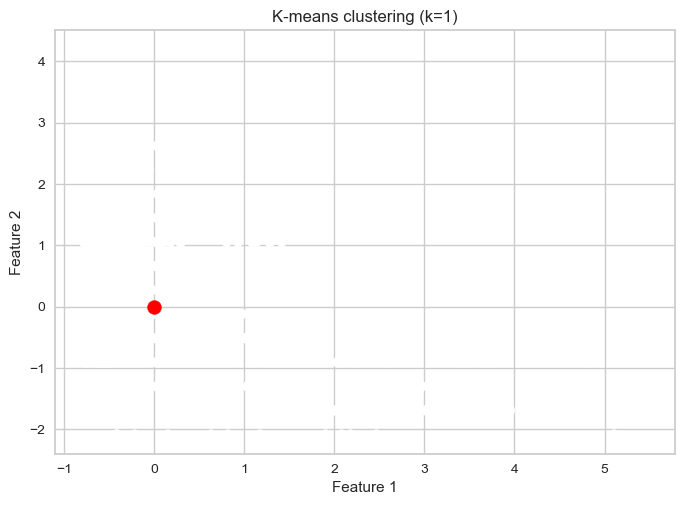

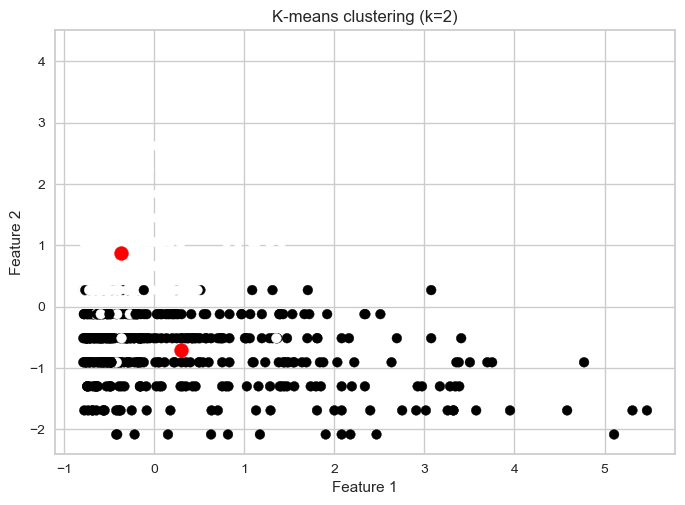

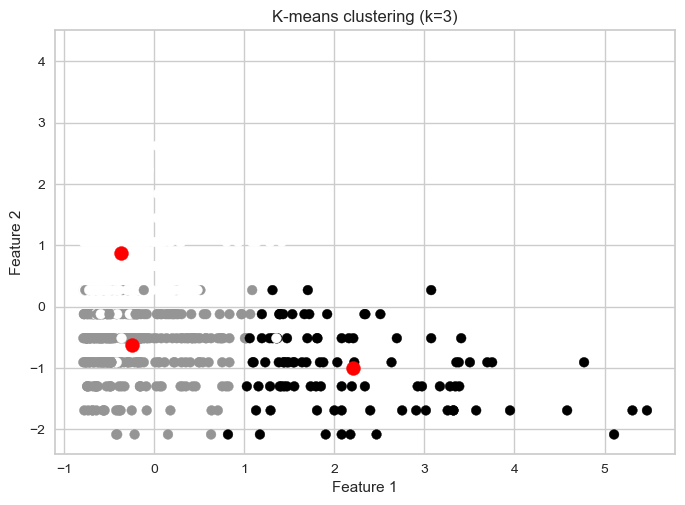

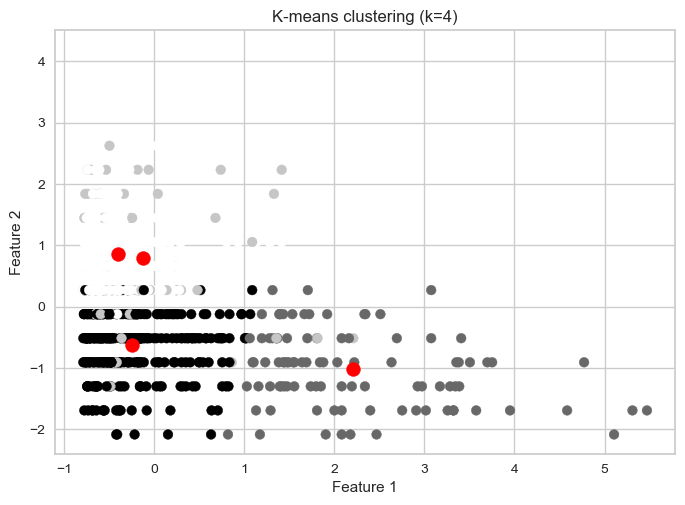

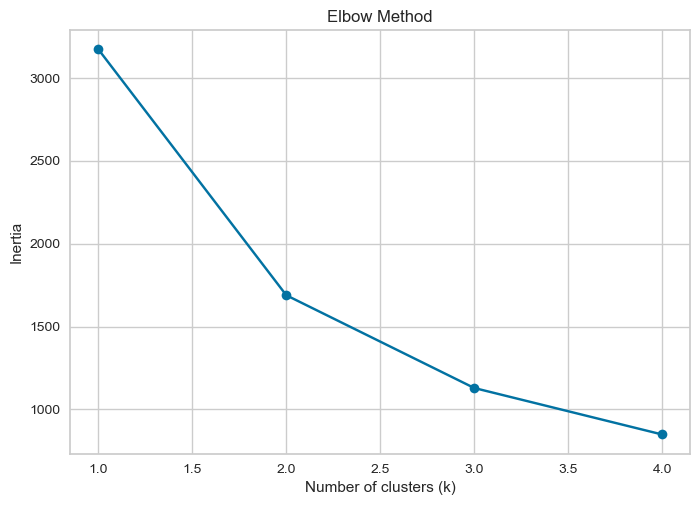

In [16]:
# Create a range of values for k
k_range = range(1, 5)

# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(rfm_scaled)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [17]:
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
AA-10315,184,5,5563.560,1
AA-10375,19,9,1056.390,0
AA-10480,259,4,1790.512,1
AA-10645,55,6,5086.935,0
AB-10015,415,3,886.156,1


In [53]:
# Rescaling the attributes
rfm_df = rfm_df[['Monetary', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.015112,-0.516429,0.199889
1,-0.700590,1.052644,-0.686762
2,-0.421139,-0.908697,0.602912
3,0.833680,-0.124161,-0.493311
4,-0.765391,-1.300965,1.441199


In [54]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

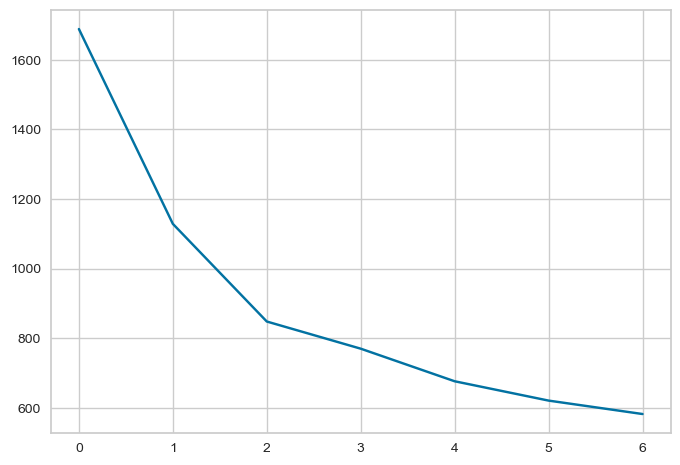

In [55]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(rfm_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [21]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(rfm_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4884236789668488
For n_clusters=3, the silhouette score is 0.530142971304449
For n_clusters=4, the silhouette score is 0.363593136850552
For n_clusters=5, the silhouette score is 0.4842136880872053
For n_clusters=6, the silhouette score is 0.2827902446642653
For n_clusters=7, the silhouette score is 0.3161614715820555
For n_clusters=8, the silhouette score is 0.31181052834974643


In [22]:
# intialise kmeans
kmeans = KMeans(n_clusters= 3, max_iter=10000)
kmeans.fit(rfm_scaled)

cluster_labels = kmeans.labels_

# silhouette score
silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=8, the silhouette score is 0.4637332277992117


In [23]:
# assign the label
rfm_df['Cluster_Id'] = kmeans.labels_
rfm_df.head()

,Monetary,Frequency,Recency,Cluster_Id
Customer ID,,,,
AA-10315,5563.560,5,184,0
AA-10375,1056.390,9,19,1
AA-10480,1790.512,4,259,0
AA-10645,5086.935,6,55,1
AB-10015,886.156,3,415,0


<Axes: xlabel='Cluster_Id', ylabel='Monetary'>

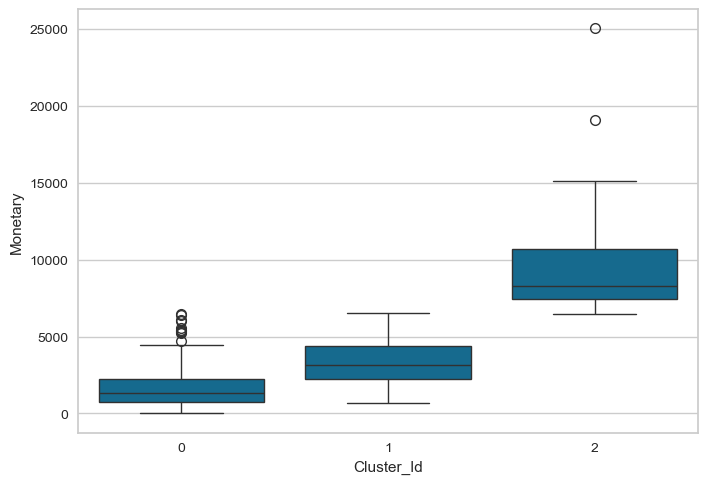

In [24]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_df)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

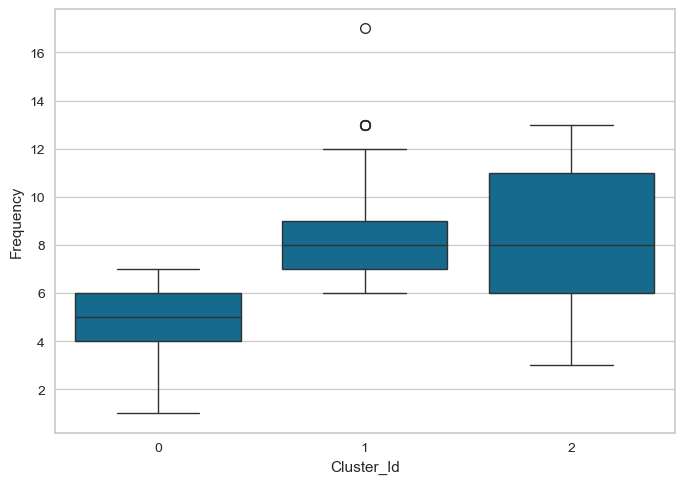

In [25]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

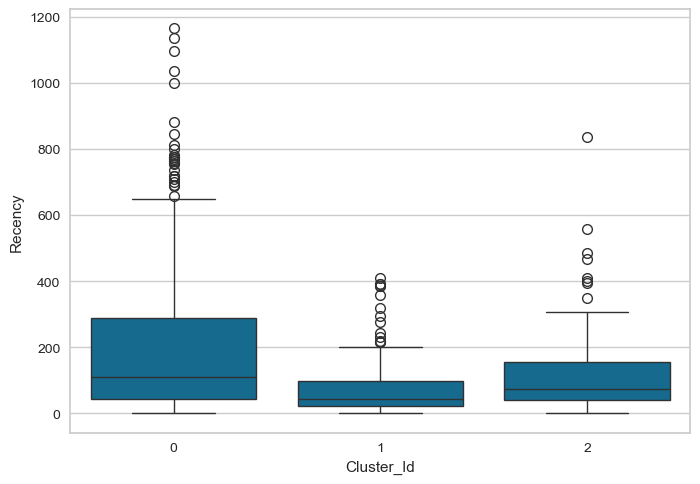

In [31]:
#need to check again
# # Box plot to visualize Cluster Id vs Amount
# sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_df)

# # Box plot to visualize Cluster Id vs Frequency
# sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df)

# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df)

In [27]:
# Assign the labels to each data point, and execute the following script.
# kmeans.labels_
# label_list=kmeans.labels_
# sorted(Counter(label_list).items())

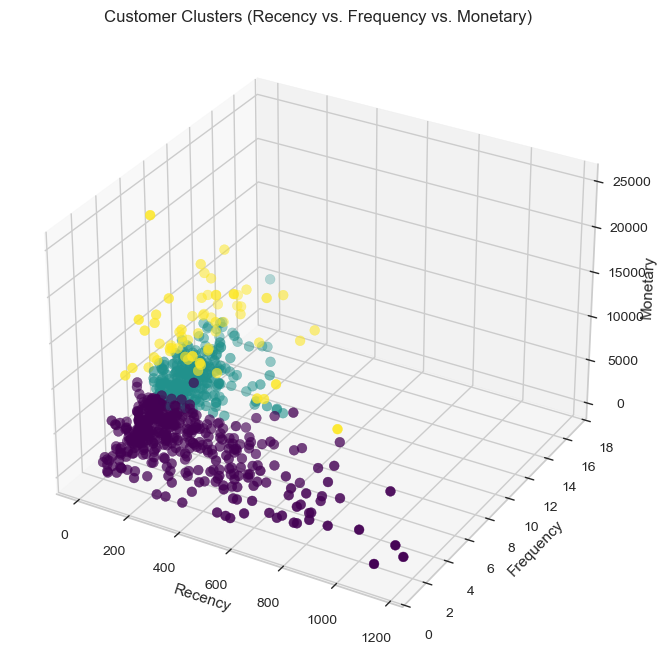

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_df['Cluster_Id'], cmap='viridis', s=50)  # Use 'c' for color based on Cluster_Id

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')  # Replace 'Frequency' with your third dimension label
ax.set_title('Customer Clusters (Recency vs. Frequency vs. Monetary)')  # Update title
plt.show()
# # Create a legend
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="upper right", title="Cluster_Id")
# ax.add_artist(legend1)

# plt.show()

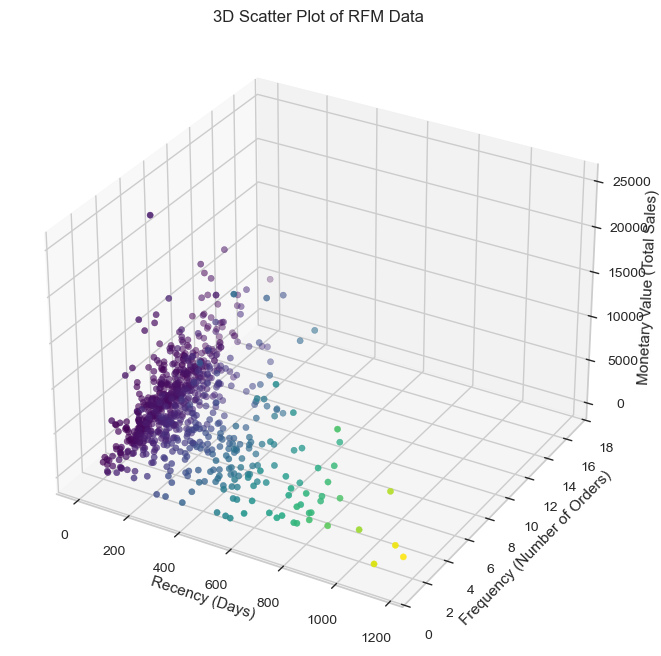

In [43]:
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
color = rfm_df['Recency']
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], marker='o',c=color, cmap= "viridis")

ax.set_xlabel('Recency (Days)')
ax.set_ylabel('Frequency (Number of Orders)')
ax.set_zlabel('Monetary Value (Total Sales)')
ax.set_title('3D Scatter Plot of RFM Data')

plt.show()

In [34]:
rfm_df.head()

,Monetary,Frequency,Recency,Cluster_Id
Customer ID,,,,
AA-10315,5563.560,5,184,0
AA-10375,1056.390,9,19,1
AA-10480,1790.512,4,259,0
AA-10645,5086.935,6,55,1
AB-10015,886.156,3,415,0


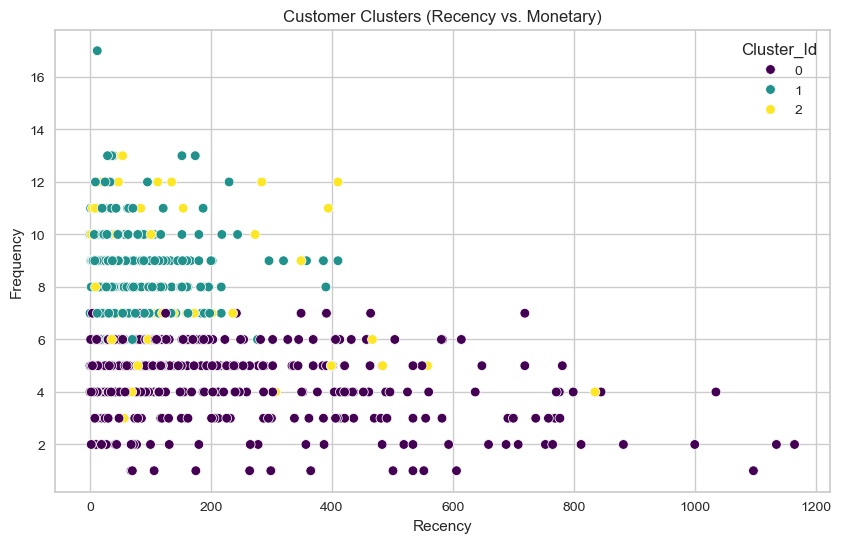

In [51]:
# Visualize Clusters (Example: Recency vs. Monetary)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster_Id', data=rfm_df, palette='viridis')
plt.title('Customer Clusters (Recency vs. Monetary)')
plt.show()

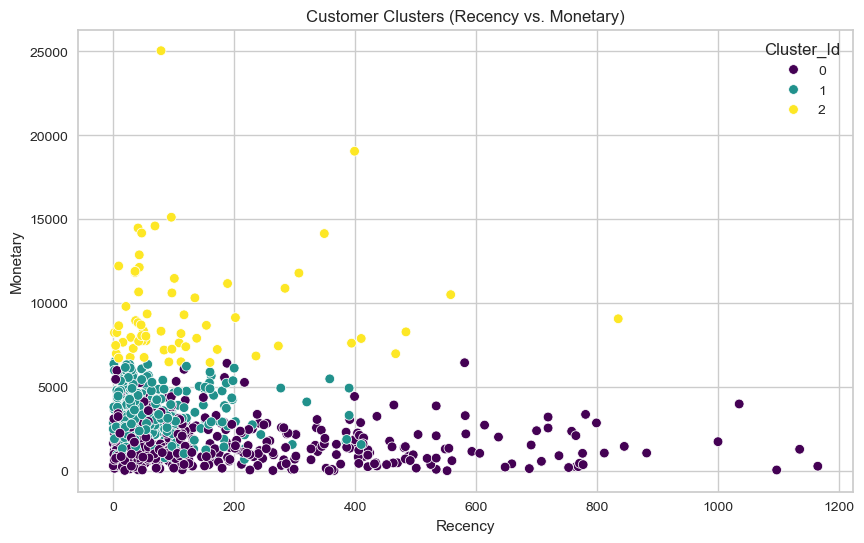

In [35]:
# Visualize Clusters (Example: Recency vs. Monetary)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster_Id', data=rfm_df, palette='viridis')
plt.title('Customer Clusters (Recency vs. Monetary)')
plt.show()

In [ ]:
# Analyze Cluster Characteristics
cluster_summary = rfm_df.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        # 'Customer ID' : 'count'
}).reset_index()
print("\nCustomer Cluster Summary:\n", cluster_summary)


Customer Cluster Summary:
    Cluster     Recency  Frequency     Monetary
0        0   78.037344   8.958506  5403.889333
1        1   87.823129   5.512472  1843.926364
2        2  530.423423   3.774775  1636.864907


In [ ]:
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
AA-10315,184,5,5563.560,0
AA-10375,19,9,1056.390,0
AA-10480,259,4,1790.512,0
AA-10645,55,6,5086.935,2
AB-10015,415,3,886.156,1


# Are sales higher during specific months or seasons?

In [ ]:
# # Set "Order Date" as the index
# df.set_index('Order Date', inplace=True)

# # Resample and plot
# monthly_sales = df['Sales'].resample('M').sum()
# plt.figure(figsize=(12, 6))
# monthly_sales.plot()
# plt.title('Monthly Sales Trend')
# plt.show()

In [ ]:
# monthly_sales = df['Sales'].resample('M').sum()
# plt.figure(figsize=(12, 6))
# monthly_sales.plot()
# plt.title('Monthly Sales Trend')
# plt.xlabel('Month')
# plt.ylabel('Sales')
# plt.show()

In [ ]:
# # Seasonality (simplified - assuming quarters)
# df['Quarter'] = df.index.quarter
# quarterly_sales = df.groupby('Quarter')['Sales'].sum()
# print("\n2. Quarterly Sales:\n", quarterly_sales)
# plt.figure(figsize=(8, 5))
# quarterly_sales.plot(kind='bar')
# plt.title('Quarterly Sales')
# plt.xlabel('Quarter')
# plt.ylabel('Sales')
# plt.xticks(rotation=0)
# plt.show()

## Which customer segments are most valuable?


3. Most Valuable Customer Segments:
 Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


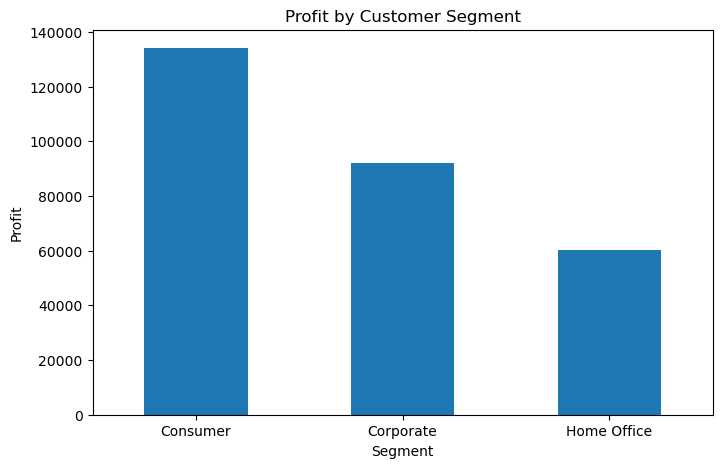

In [ ]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print("\n3. Most Valuable Customer Segments:\n", segment_profit)
plt.figure(figsize=(8, 5))
segment_profit.plot(kind='bar')
plt.title('Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.show()

# 4. Which regions have the highest sales growth potential?


4. Regions with Highest Sales:
 Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


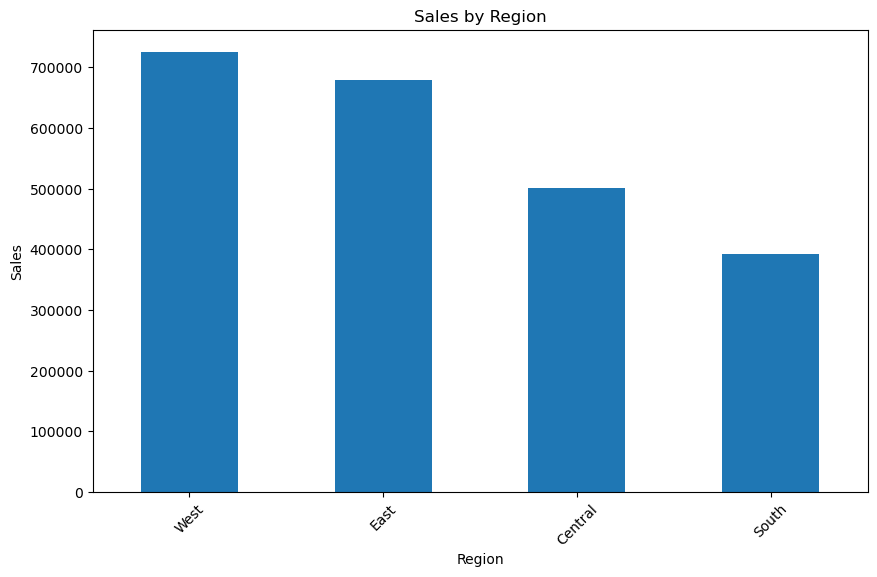

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\n4. Regions with Highest Sales:\n", region_sales)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Quarter', 'Shipping Time'],
      dtype='object')

In [ ]:
# Sales Growth Potential (Simplified - yearly sales change)
# df['Year'] = df.index.year
yearly_sales = df.groupby(['Region', 'Year'])['Sales'].sum().unstack()
yearly_sales_pct_change = yearly_sales.pct_change(axis=1) * 100
print('\nYearly Sales Percent Change by Region:\n', yearly_sales_pct_change)

KeyError: 'Year'

In [ ]:
# 5. What is the average order value?
average_order_value = df.groupby('Order ID')['Sales'].sum().mean()
print(f"\n5. Average Order Value: ${average_order_value:.2f}")


5. Average Order Value: $458.61



6. Correlation Matrix:
              Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


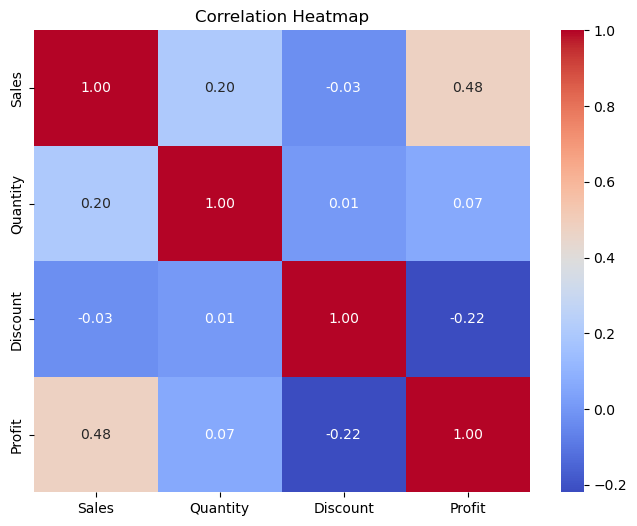

In [ ]:
# 6. Are there any correlations between product sales?
numeric_df = df[['Sales', 'Quantity', 'Discount', 'Profit']]
correlation_matrix = numeric_df.corr()
print("\n6. Correlation Matrix:\n", correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##How do discounts affect sales and profitability?

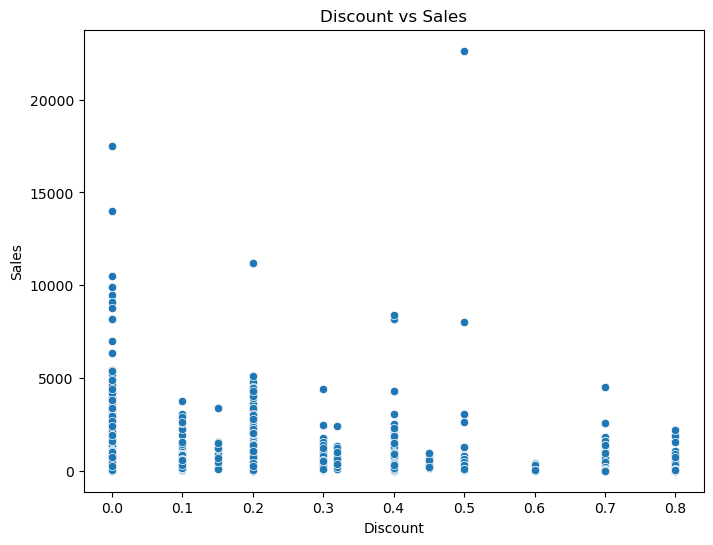

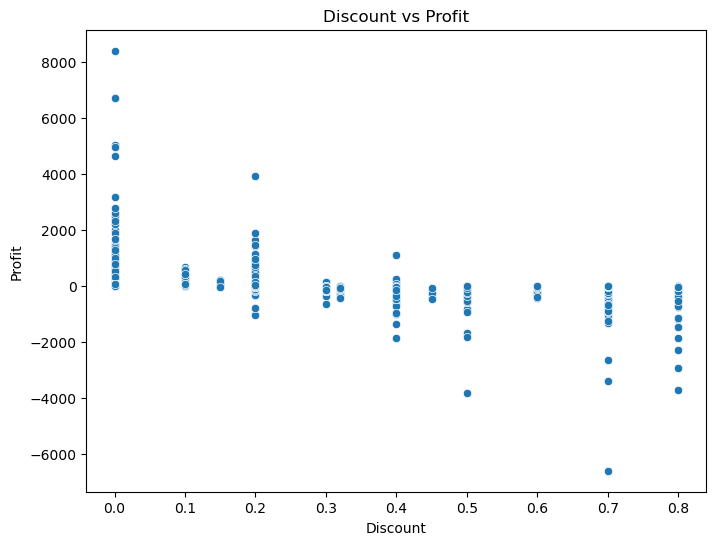

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Discount vs Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

In [ ]:
# 8. What are the shipping costs for different regions?
# (Shipping cost is not directly available, but we can approximate by assuming a relationship with shipping mode and sales)
shipping_costs = df.groupby(['Region', 'Ship Mode'])['Sales'].count().unstack()
print('\n8. Shipping Mode counts by Region:\n', shipping_costs)
# shipping cost is not available in the dataset.


8. Shipping Mode counts by Region:
 Ship Mode  First Class  Same Day  Second Class  Standard Class
Region                                                        
Central            299       120           465            1439
East               490       155           530            1673
South              234        83           329             974
West               515       185           621            1882


In [ ]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Quarter,Shipping Time,Quarter,Year
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2,0.00,41.9136,2016,11,4,3,4,2016
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,3,0.00,219.5820,2016,11,4,3,4,2016
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2,0.00,6.8714,2016,6,2,4,2,2016
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,5,0.45,-383.0310,2015,10,4,7,4,2015
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2,0.20,2.5164,2015,10,4,7,4,2015


## Sales Performance

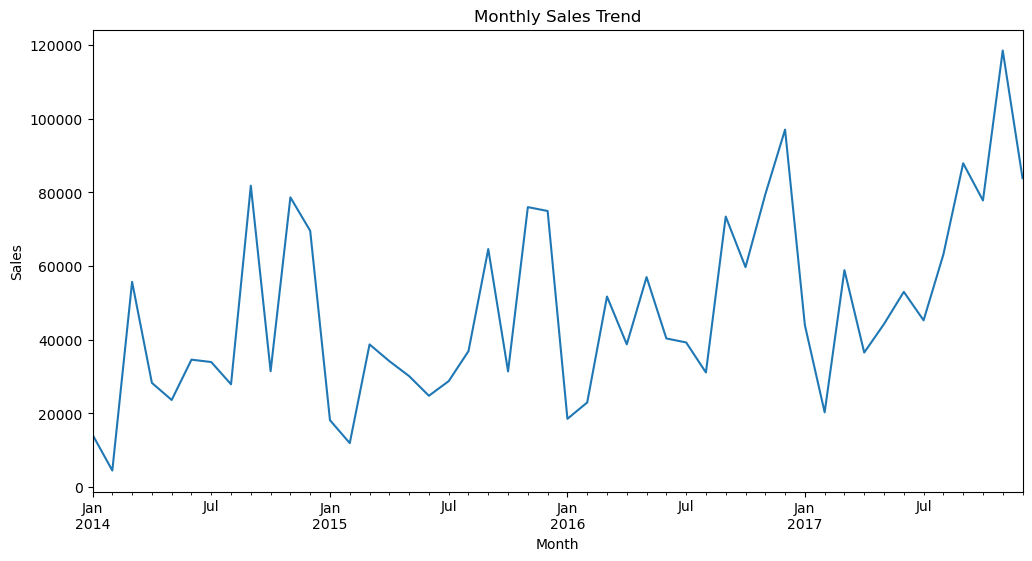

In [ ]:
monthly_sales = df['Sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

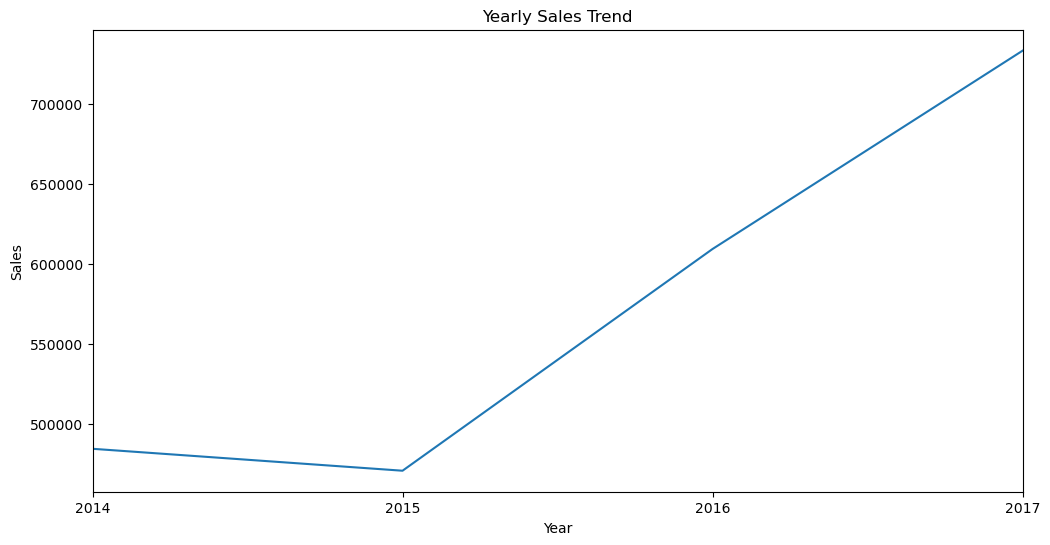

In [ ]:
yearly_sales = df['Sales'].resample('Y').sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot()
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


## Sales by Product

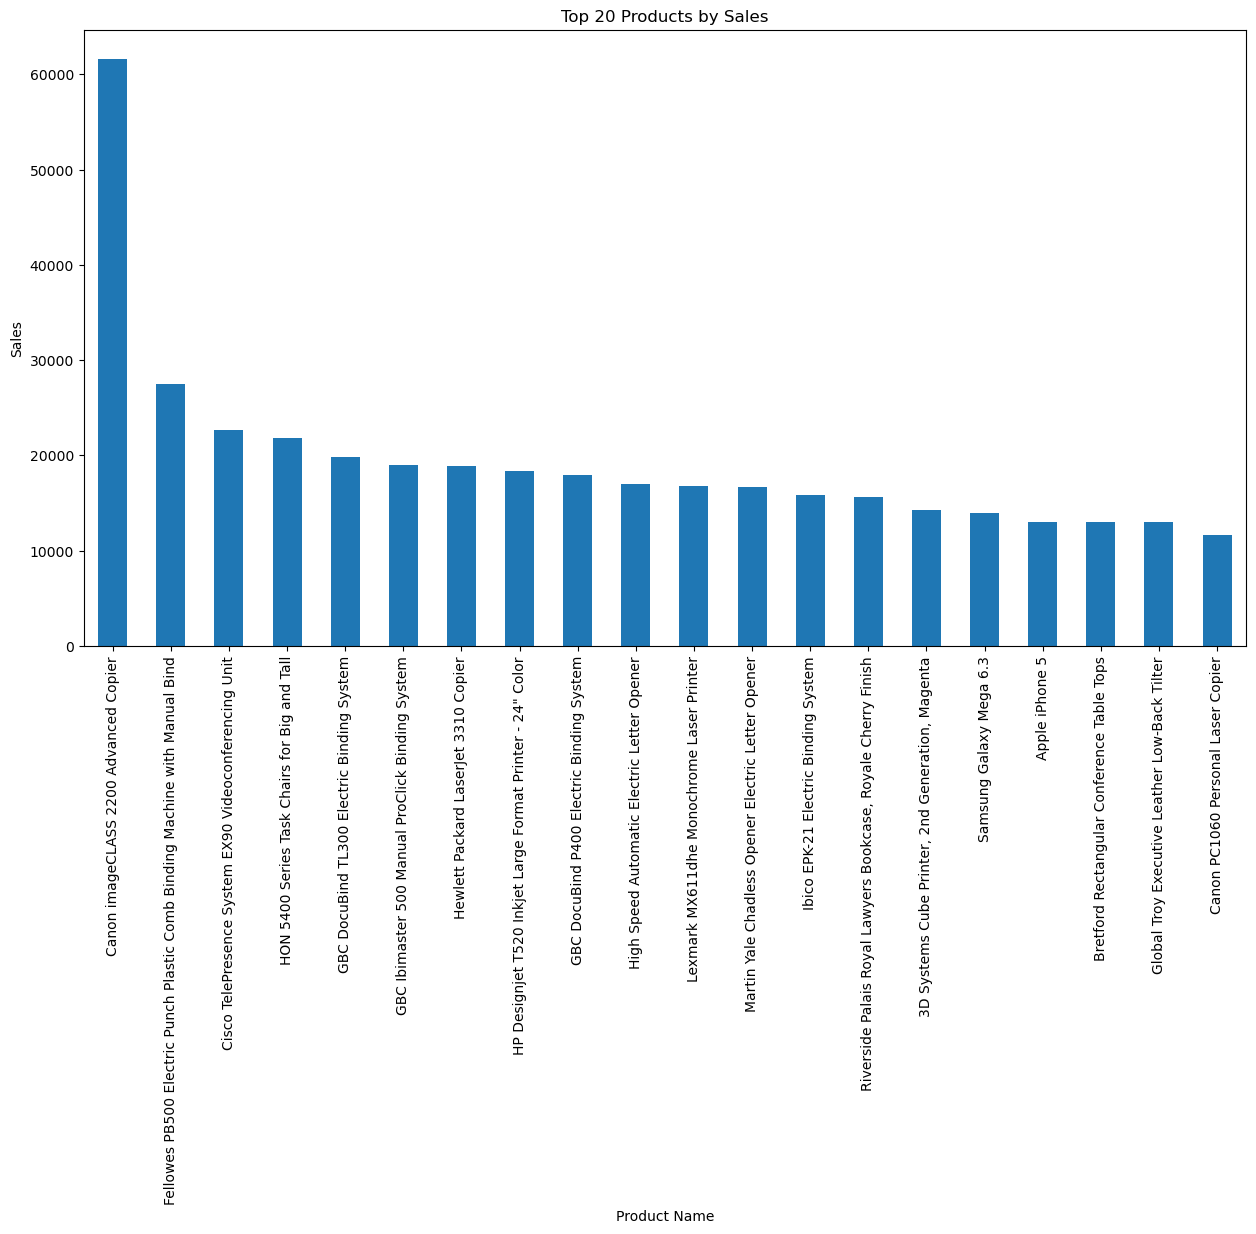

In [ ]:
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
product_sales.head(20).plot(kind='bar') # Top 20 products
plt.title('Top 20 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

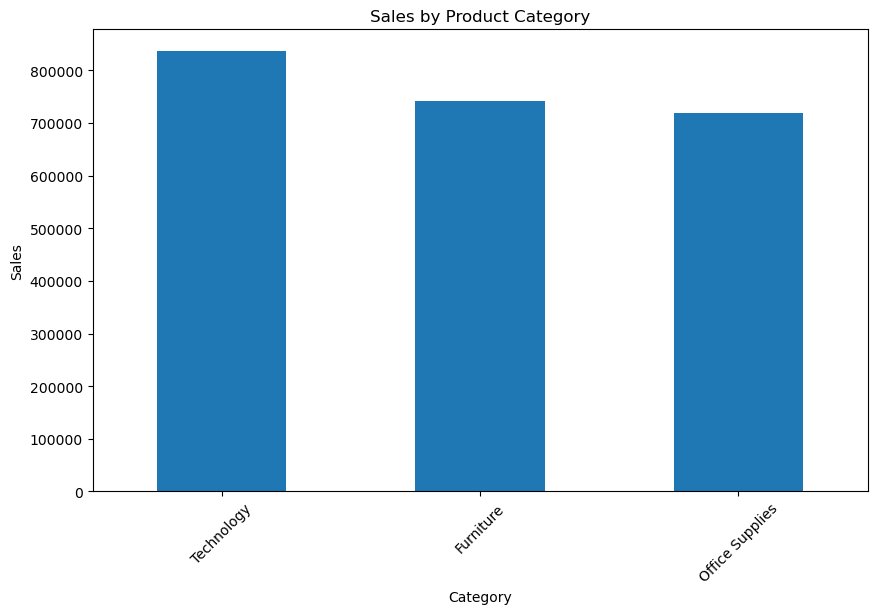

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Quarter', 'Shipping Time', 'Quarter', 'Year'],
      dtype='object')

## Sales by Region/Market

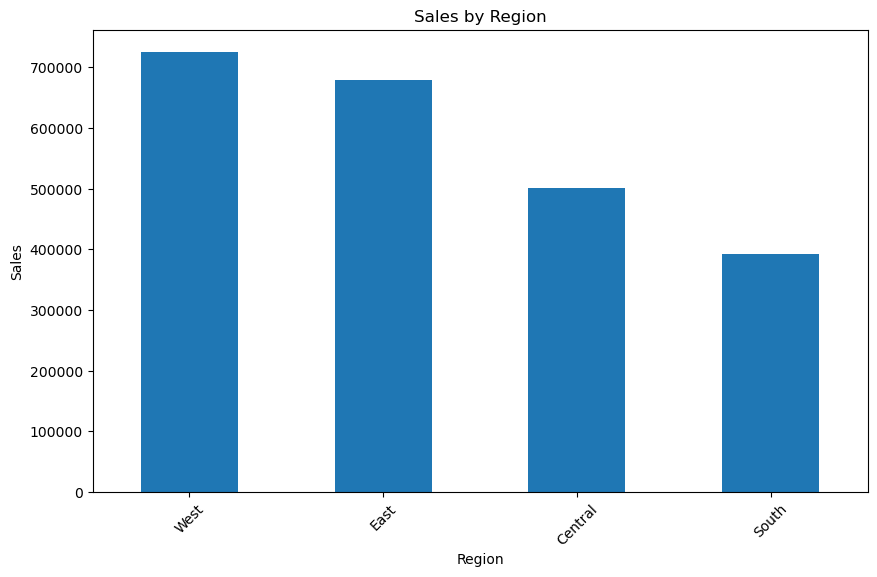

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

## Sales by Customer Segment

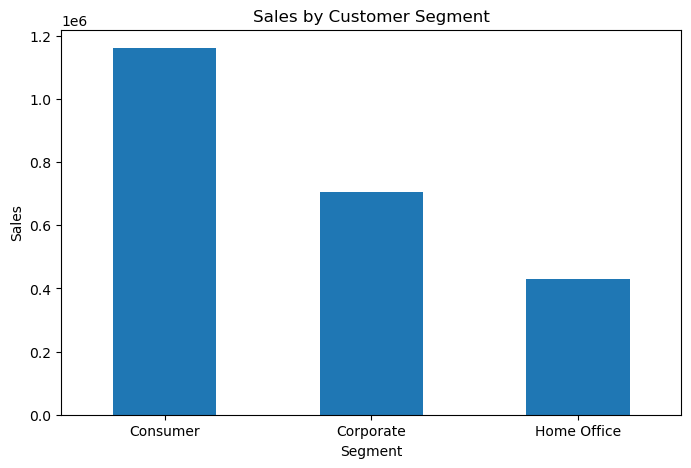

In [ ]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
segment_sales.plot(kind='bar')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

## Profitability Analysis

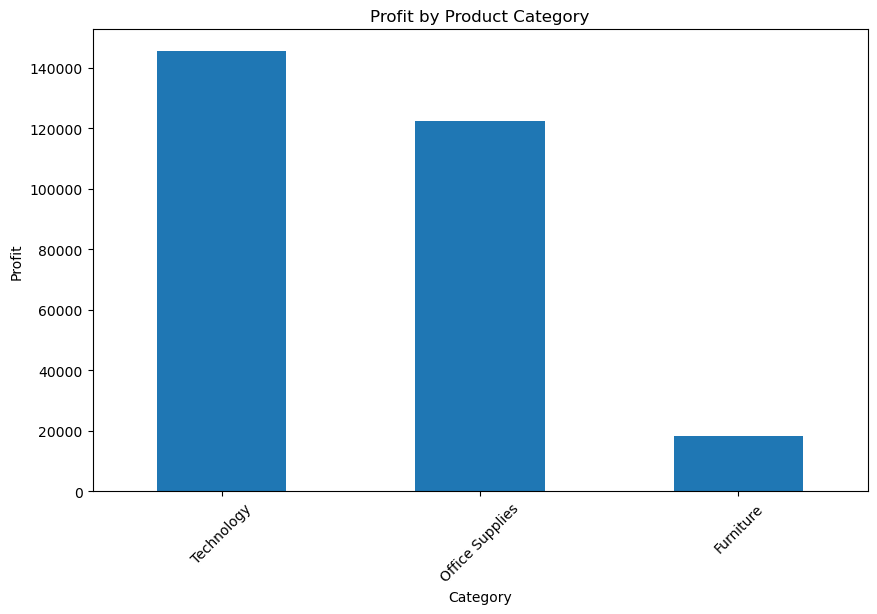

In [ ]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar')
plt.title('Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


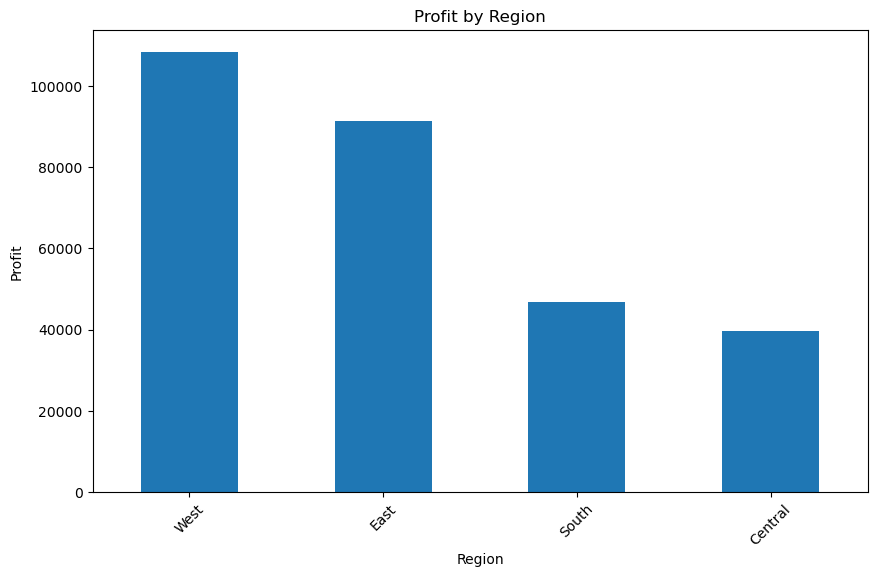

In [ ]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_profit.plot(kind='bar')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

In [ ]:
monthly_sales = df['Sales'].resample('M').sum()
quarterly_sales = df['Sales'].resample('Q').sum()
print("\nMonthly Sales Trend:\n", monthly_sales.head())
print("\nQuarterly Sales:\n", quarterly_sales)


Monthly Sales Trend:
 Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: Sales, dtype: float64

Quarterly Sales:
 Order Date
2014-03-31     74447.7960
2014-06-30     86538.7596
2014-09-30    143633.2123
2014-12-31    179627.7302
2015-03-31     68851.7386
2015-06-30     89124.1870
2015-09-30    130259.5752
2015-12-31    182297.0082
2016-03-31     93237.1810
2016-06-30    136082.3010
2016-09-30    143787.3622
2016-12-31    236098.7538
2017-03-31    123144.8602
2017-06-30    133764.3720
2017-09-30    196251.9560
2017-12-31    280054.0670
Freq: QE-DEC, Name: Sales, dtype: float64


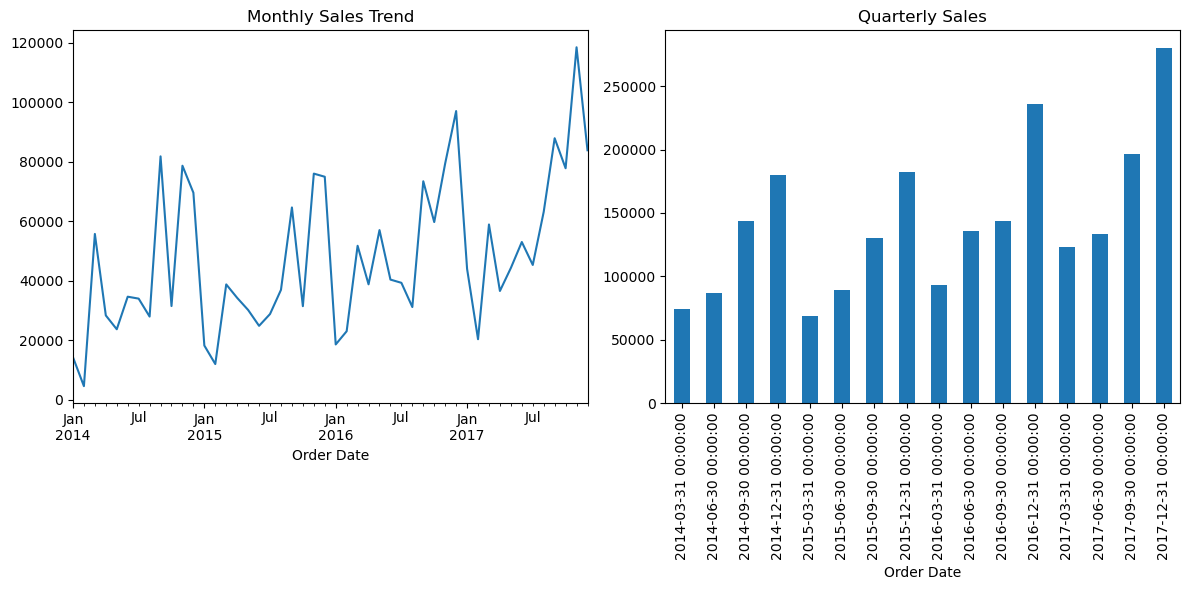

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.subplot(1, 2, 2)
quarterly_sales.plot(kind='bar')
plt.title('Quarterly Sales')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Quarter', 'Shipping Time', 'Quarter', 'Year'],
      dtype='object')

In [ ]:
import pandas as pd

# Calculate Average Order Value
order_values = df.groupby('Order ID')['Sales'].sum().reset_index()
average_order_value = order_values['Sales'].mean()

# Calculate Yearly Sales Percent Change by Region
yearly_sales = df.groupby(['Region', 'Year'])['Sales'].sum().unstack()
yearly_sales_pct_change = yearly_sales.pct_change(axis=1) * 100
yearly_sales_pct_change = yearly_sales_pct_change.reset_index().melt(id_vars='Region', var_name='Year', value_name='Pct Change')

# Save to CSV for Tableau
# df.to_csv('superstore_cleaned.csv', index=False)
# yearly_sales_pct_change.to_csv('yearly_sales_pct_change.csv', index=False)

In [ ]:
# Recency
max_date = df['Order Date'].max()
rfm_recency = df.groupby('Customer ID')['Order Date'].max().apply(lambda x: (max_date - x).days)

# Frequency
rfm_frequency = df.groupby('Customer ID')['Order ID'].nunique()

# Monetary Value
rfm_monetary = df.groupby('Customer ID')['Sales'].sum()

# Create RFM DataFrame
rfm_df = pd.DataFrame({
'Recency': rfm_recency,
'Frequency': rfm_frequency,
'Monetary': rfm_monetary
})

In [ ]:
# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# K-Means Clustering (Example: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize Clusters (Example: Recency vs. Monetary)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df, palette='viridis')
plt.title('Customer Clusters (Recency vs. Monetary)')
plt.show()

# Analyze Cluster Characteristics
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID' : 'count'
}).reset_index()
print("\nCustomer Cluster Summary:\n", cluster_summary)